# To consider

Trying to test gym_anytrading to check if worth it.

Still understanding what ticks do, noticed the default dataset had too many hours within a day so I made a quick script to get only midnight values ->  FOREX_EURUSD_1H_ASK_DAILY.csv

The frame_bound selects how many rows will be taken into consideration, window_size how many we will take into account each step.

        action = env.action_space.sample()

Seems to ask for a random action 

Apparently we can extend these env to configure extra things. Including "with your desired policies for calculating reward, profit, fee, etc."

Things to read:

https://github.com/AminHP/gym-anytrading

https://github.com/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb


Todos

- [ ] Can we make our measures work




In [2]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt
import pandas as pd

## Random Agent

info: {'total_reward': -447.7999999999693, 'total_profit': 0.9253892736654011, 'position': 1}


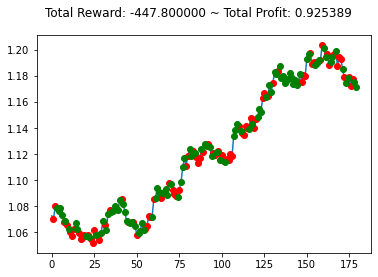

In [59]:
df = pd.read_csv("FOREX_EURUSD_1H_ASK_DAILY.csv")
env = gym.make('forex-v0', df=df,frame_bound=(21, 200), window_size=1)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

obs = []

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    obs.append({"obs":observation[0]})
    #env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [53]:
1.05281-1.04665

0.006159999999999943

## 12 Turtles Based Agent

#### Rules:

Entries
* System 1: Buy when price over 20 day breakout (low ou high)
* System 2: Buy when price over 55 day breakout (low ou high) 

*Disclaimer: we aren't actually following their system since they considering intraday pricing and we should consider the amount of units traded later*

**TODO ter em consideração Position Sizing e Market volatility - chap 3**

**TODO are we just trading a fixed amount? Sell everything or buy with everything? How do we change this? Do we want to change?**

*Disclaimer manter action equivale a hold (basta checkar o reward para not breakouts)*

info: {'total_reward': -764.300000000011, 'total_profit': 0.9197566242280535, 'position': 0}
[1.05281, 1.04665, 1.0394700000000001, 1.05405, 1.0590600000000001, 1.0535299999999999, 1.05902, 1.0558, 1.0582200000000002, 1.06098, 1.06292, 1.06064, 1.07095, 1.06259, 1.0654, 1.07241, 1.0760399999999999, 1.07314, 1.07628, 1.0683200000000002, 1.0723200000000002, 1.06976, 1.07962, 1.07828, 1.07613, 1.07845, 1.0730899999999999, 1.06781, 1.0687799999999998, 1.06556, 1.06216, 1.06006, 1.0569, 1.0621399999999999, 1.06682, 1.06195, 1.05904, 1.05439, 1.05519, 1.0574299999999999, 1.0565, 1.0579399999999999, 1.0562799999999999, 1.05425, 1.05156, 1.06126, 1.05751, 1.05713, 1.05382, 1.05884, 1.06827, 1.06566, 1.06128, 1.07359, 1.0767200000000001, 1.07508, 1.0760100000000001, 1.07998, 1.07864, 1.07669, 1.08461, 1.08568, 1.0817700000000001, 1.0751600000000001, 1.0682399999999999, 1.06731, 1.06697, 1.068, 1.06769, 1.06445, 1.05772, 1.0591899999999999, 1.06087, 1.0666, 1.06141, 1.06206, 1.0644, 1.07261, 1.0

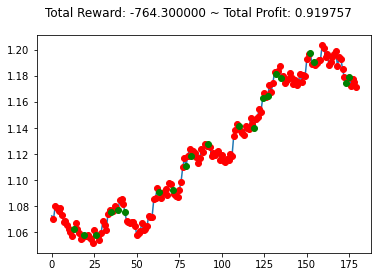

In [61]:
#System 1 
#Not considering units
#Not considering intraday pricing
#Not trading amounts TODO apparently you just buy or sell ?!
df = pd.read_csv("FOREX_EURUSD_1H_ASK_DAILY.csv")
env = gym.make('forex-v0', df=df,frame_bound=(21, 200), window_size=1)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

pastCloses = list(df['Close'][0:20])
observation = env.reset()
sold = False
while True:
    #print(observation)
    #print()
    lastClose = observation[0][0]
    min20 = min(pastCloses[-20:])
    max20 = max(pastCloses[-20:])
    
    breakout = False
    if(lastClose > max20 or  lastClose < min20): #Looks for breakout
        breakout = True #useless
        if(sold):
            action = 1 #buy
            sold = False #smarter way to do this just flip 0 and 1
        else:
            action = 0
            sold = True
    
    #action = env.action_space.sample()
    pastCloses.append(observation[0][0])
    observation, reward, done, info = env.step(action)

    if done:
        pastCloses.append(observation[0][0])
        print("info:", info)
        break

print(pastCloses) #== 
#print(list(df['Close'][0:199]))
plt.cla()
env.render_all()
plt.show()